In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

In [235]:
data = pd.read_csv('dataset_1.csv')
data= data.drop(columns='Unnamed: 0')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=scaler.fit_transform(data)
data= np.round(data,3)
# data.info()
data

array([[ 1.14 , -0.945],
       [ 2.105, -0.437],
       [ 0.417, -1.295],
       ...,
       [-0.879,  0.978],
       [-0.619,  1.004],
       [-1.168,  0.363]])

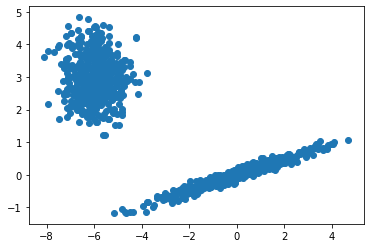

In [3]:
plt.scatter(data["normalized_age"], data["normalized_salary"])

In [340]:

def start_kmeans(k, array):
    centroids ={}
    random_indices = random.sample(range(0, array.shape[0]), k)
    
    for i in range(k):
        centroids[i] = array[random_indices[i]]
     
    return centroids

# centroids= start_kmeans(2,cancer_X)
# centroids[0]

In [341]:
def assign_clusters(centroids, data,k):
    clusters = {}
    for i in range(k):
         clusters[i]= []
        
    for row in data:
        distances = [np.linalg.norm(row-centroids[centroid]) for centroid in centroids]
        
        cluster = [key for key, value in enumerate(distances) if value==min(distances)][0]
        
        clusters[cluster].append(row)
        
    return clusters

# assign_clusters(centroids, cancer_X,2)

In [54]:
def new_centroids (clusters):
    for cluster in clusters:
                centroids[cluster] = np.average(clusters[cluster],axis=0)
            
    return centroids



In [83]:
def run_kmeans (k,df, max_iter):
    centroids = start_kmeans(k, df)
    clusters = assign_clusters(centroids, data,k)
    all_centroids= {}
    
    for iteration in range(0, max_iter):
        
        centroids = new_centroids(clusters)
        all_centroids[iteration]= centroids
        clusters = assign_clusters(centroids, data,k)
    
        
    return clusters





In [328]:
class Kmeans ():
    
    def __init__(self, data, k, max_iter):
            self.data = data
            self.k = k
            self.max_iter = max_iter
            self.clusters = {}
            
    
    def start_kmeans(self):
        
        self.centroids = {}
        
        self.random_indices = random.sample(range(0, self.data.shape[0]), self.k)
        
        for i in range(self.k):
            
            self.centroids[i] = self.data[self.random_indices[i]]
     
        return self.centroids
    
    def assign_clusters(self, centroids):
        
        self.ykmeans=[]
        
        for i in range(self.k):
             self.clusters[i]= []
             
        
        for row in self.data:
            distances = [np.linalg.norm(row-self.centroids[centroid]) for centroid in self.centroids]
        
            cluster = [key for key, value in enumerate(distances) if value==min(distances)][0]
            
            self.ykmeans.append(cluster)
            self.clusters[cluster].append(row)
        
        return self.clusters, self.ykmeans
  
    def new_centroids (self, clusters):
        
        for cluster in self.clusters:
                self.centroids[cluster] = np.mean(self.clusters[cluster],axis=0)
            
        return self.centroids
    
    
    def run_kmeans (self):
    
        self.centroids = self.start_kmeans()
        self.clusters, self.ykmeans = self.assign_clusters(self.centroids)
#         all_centroids= {}

        for iteration in range(0, self.max_iter):

            self.centroids = new_centroids(self.clusters)
    #         all_centroids[iteration]= centroids
            self.clusters, self.ykmeans = self.assign_clusters(self.centroids)

        
        return self.clusters, self.ykmeans

    def plot (self):
        
        plt.scatter(self.data[:, 0], self.data[:, 1], c=self.ykmeans, s=50,)
        plt.scatter(np.array(list(self.centroids.values()))[:, 0], np.array(list(self.centroids.values()))[:, 1], c='black', s=200, alpha=0.5);
        
    
    


In [319]:
kmeans= Kmeans(data, 4, 300)

run_kmeans= kmeans.run_kmeans()

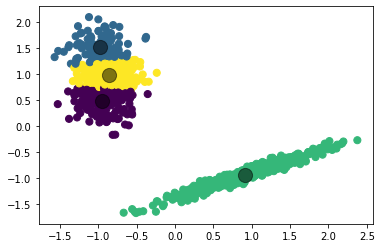

In [320]:
kmeans.plot()
# 

In [330]:
# Breast cancer dataset
cancer= pd.read_csv('Breast Cancer.csv')
print(df.shape)
cancer_X= cancer.drop(columns=['diagnosis','Unnamed: 32'])
cancer_y= cancer['diagnosis']
cancer_X

(569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [331]:
cancer_X=scaler.fit_transform(cancer_X)

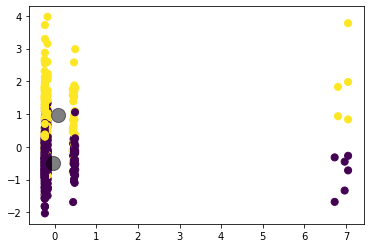

In [333]:
cancer_kmeans= Kmeans(cancer_X, 2, 500)

cancer_run_kmeans= cancer_kmeans.run_kmeans()
cancer_kmeans.plot()